<center><h1> Lab 06: <br> Measuring the Local Acceleration due to Gravity </h1></center>
<h2>Introduction</h2>
In this lab we will drop three different objects off our atrium balcony. We will film each object as it falls, digitize the video and use imageJ/python to analyze the data.
<br><br>

We will drop a lead-filled tennis ball, a regular tennis ball and a nerf ball. (Be sure that you do not drop the lead-filled tennis ball on someone's head!) We will use this data to measure the value of the local acceleration due to gravity "g".
<br><br>

<i>We will assume in this lab that the effect of air resistance is negligible over the 17ft drop; </i>in next week's lab, though, we will consider the effects of this assumption.
<br><br>

For this lab you will be working in teams of two.
<br>

<h2>Taking the Data</h2>
<h3>Gathering Data Using imageJ</h3>
To find the path of the ball, first open your video in imageJ by dragging and dropping the file onto the main window. Before doing any tracking, we first need to find our conversion factor from pixels to meters. This can be done very easily by selecting the "straight" tool and drawing a line between two of the white bands in the image. Then select "Analyze>Measure" and read off the length value. To make the object easier to track, we will go to "Image>Adjust>Canvas Size" Then enter a width number (about 100 should do). Make sure position is set to center and press ok. Play the video and make sure the ball is never out of frame. If it is, re-open the video and use a larger value. Now we need to apply a threshold to the image. We do this by going to "Image>Adjust>Threshold". Experiment with different methods and threshold values until the ball is the only colored object in the video (using method Huang with values 19 and 255 should produce good results, but will still require some changes depending on the video). Once you have found a good threshold click "Set" and then "Apply", uncheck the box "Calculate threshold for each image" and then press OK. We are now ready to track the motion of the ball. Select "Plugins>Tracking>TrackMate, if it asks to swap Z and T press ok. Since we have already cropped our image, go ahead and click "next". Now change the detector method to "Thresholding detector" and click next. Select "Preview", if you have applied a good threshold earlier, you should see that only 1 object has been detected. Click next. For "Initial Thresholding", make sure the entire range is selected and click next. No filtering is needed, so click next. Selected the "Kalman" tracking method and click next. The default parameters are fine for our case, so click next. No filters are needed, click next. Now select the "Tracks" button and click "Export as CSV".

[ 1.70520632 -4.19693809 -1.81764878  0.61848744  5.89219   ]


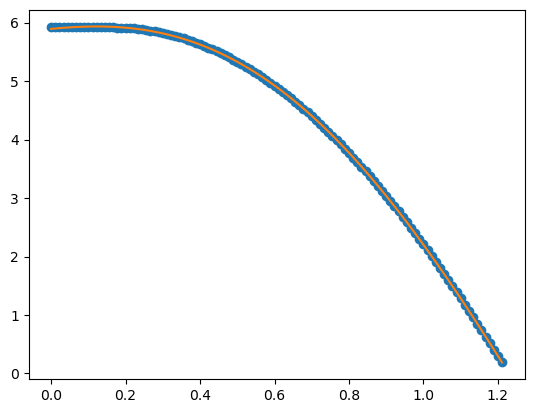

In [1]:
#meters:pix = 1:304
#90 fps

import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline

#import our CSV file
with open('tennis_tracks.csv', 'r') as file:
    reader = csv.reader(file)
    Time = []
    Position = []
    for row in reader:
        
        #Take only the Y position data
        Position.append(row[5])
        
        #Take only the Time data
        Time.append(row[7])
    
    
    #Get rid of the text at the beginning of the lists
    Time = Time[4:]
    Position = Position[4:]
    
    #since our original video was 300x1900 we can subtract the position from 1900 to find the real position
    Position = [1900 - float(i) for i in Position]
    
    #We can convert our frame data into physical data by dividing the frame number by the frame rate (90 fps)    
    Time_Physical = [float(i) / 90 for i in Time]
    
    #Using the value we found earlier, we can convert the pixel distances to meters.
    Position_Physical = [float(i) / 304 for i in Position]
    
    #We want to remove the data after the ball hits the ground, to do so we find the index of the lowest element
    #and remove the data after that point for both lists.
    index = Position_Physical.index(min(Position_Physical))
    Position_Physical = Position_Physical[:index+1]
    Time_Physical = Time_Physical[:index+1]
    
    #fit our data
    p = np.polyfit(Time_Physical, Position_Physical, deg=4)
    y = np.polyval(p,Time_Physical)
    
    #print the coefficients and plot our data
    print(p)
    plt.plot(Time_Physical, Position_Physical,"o")
    plt.plot(Time_Physical,y)
    plt.show()

<h2>Errors</h2>
There are a number of sources of error in this lab. You should consider the following.<br>
Is air resistance really negligible?<br>
Were the objects consistently dropped from the correct height?<br>
How accurate are you in reading the position of the objects in each movie frame?<br>
How much error is there in the measurement of t?<br>
How good is your fit? That is what is the standard deviation for you data?
<br><br>
We can easily calculate the standard deviation as follows:
if we have a list of data $[[x_1, f(x_1)],[x_2, f(x_2)], \dots, [x_n, f(x_n)]]$, and a fuction $g(x)$ which is supposed to fit the data we compute $(f[x_n] - g[x_n])^2$ for each data point $x_n$. We then sum the squares of the differences, divide by the number of data points and divide by the number of data points minus one. 
<h3>Sample Calculation</h3>
<center>$\sigma = \sqrt{\frac{1}{N-1} \sum_{i=1}^{N} (f(x_i) - g(x_i))^2}$</center>

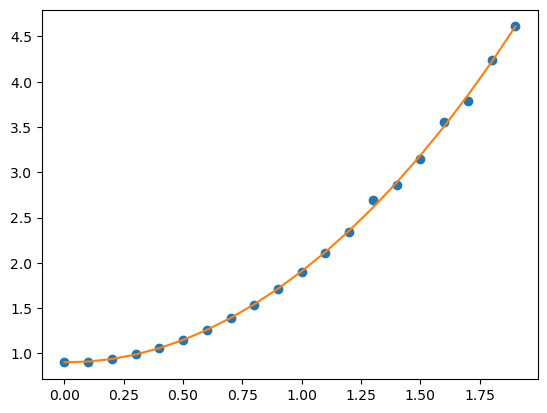

0.02885158012343225


In [2]:
import random

#generate some random data, we can use the same time data
test_data = [1 + (x/10)**2 + 1/10 * random.randrange(-1,1) for x in range(20)]
test_time = [x/10 for x in range(20)]

#fit polynomial
fit = np.polyfit(test_time, test_data, deg=4)

#evluate at our times
test_y = np.polyval(fit, test_time)

#plot both lines
plt.plot(test_time, test_data, "o")
plt.plot(test_time, test_y)
plt.show()

#calculate std_dev

a=[]
for i in range(len(test_data)):
    a.append((test_data[i] - test_y[i])**2)

b = sum(a)

std_dev = (np.sqrt(b / (len(test_data) - 1)) )

print(std_dev)

<h2>Upshot</h2>
This is a rough outline of the experiment. <i>This is not necessarily a complete list of what needs to be done.</i>
<br>
1) Record video of three balls in free fall, each made of a different material.<br>
2) Take data from the videos using ImageJ2.<br>
3) Convert pixles to meters and framerate to seconds.<br>
4) Analyze and plot your data, then do a fit. How well does your data match your understanding of the theory?<br>
5) Don't forget to include error analysis! All numerical quantities, measured or calculated, have an associated uncertainty which needs to be reported.
6) Address briefly whether your measured values for $g$ are reasonable. What could be done to get a better estimate?
<h2>Assignment</h2>
The assignment for Week 6 is a <u>full Lab Report</u> which addresses all relevant questions from this writeup, and reflects on each. This report should be written in accordance with the general rules and guidelines of the Syllabus for this course; please ask if there are any questions about what specifically is required.